
# Chapter 4





# EDA and Classification using Sklearn (Smarket Dataset)

Prepared by:

<b> Noman H chowdhury </b>

Reference for theoretical content:

Chapter 4 ISLP https://www.statlearning.com/


## The Stock Market Data

In this lab we will examine the `Smarket` 
data, which is part of the `ISLP`
library. This data set consists of percentage returns for the S&P 500
stock index over 1,250 days, from the beginning of 2001 until the end
of 2005. For each date, we have recorded the percentage returns for
each of the five previous trading days,  `Lag1`  through
 `Lag5`. We have also recorded  `Volume`  (the number of
shares traded on the previous day, in billions),  `Today`  (the
percentage return on the date in question) and  `Direction`
(whether the market was  `Up`  or  `Down`  on this date).

We start by importing  our libraries at this top level; these are all imports we have seen in previous labs.

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
#test

Now we are ready to load the `Smarket` data.

In [2]:
import os
os.chdir("C:\\Users\\noman\\My Drive\\BMGT7074_BA_2024 _sem2\\ISLP\My_work")
os.getcwd()

'C:\\Users\\noman\\My Drive\\BMGT7074_BA_2024 _sem2\\ISLP\\My_work'

In [5]:
Smarket = pd.read_csv('Smarket.csv')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


Dataset Description: Smarket

    Year: The year in which the stock market data was recorded. It spans from 2001 to 2005, providing a historical perspective on market behavior over these years.

    Lag1 to Lag5: These columns represent lagged returns, meaning they show the returns from previous days. Specifically, Lag1 shows the return from 1 day prior, Lag2 from 2 days prior, and so forth up to Lag5 from 5 days prior. Lagged returns are used to analyze the effect of past performance on future trends without looking directly at the day in question, which helps in creating predictive models that are not biased by the immediate past.

    Volume: This column represents the volume of shares traded on a particular day. Volume is a key indicator in stock markets, as it provides insights into the level of activity and the liquidity of the market. High trading volumes can indicate strong interest in a stock, either for buying or selling, while low volumes may suggest lesser activity.

    Today: This column shows the return on the day in question. It is a measure of the stock market's performance on that specific day, giving an insight into whether the market trended upward or downward.

    Direction: The Direction column categorizes the day's market movement as 'Up' or 'Down', based on the return value in the Today column. This is a categorical representation of the market's daily performance, simplifying the analysis of market trends.

In [ ]:
Smarket.head()

In [ ]:
# Smarket.shape
# Smarket.columns

We compute the correlation matrix using the `corr()` method
for data frames, which produces a matrix that contains all of
the pairwise correlations among the variables.
 
By instructing `pandas` to use only numeric variables, the `corr()` method does not report a correlation for the `Direction`  variable because it is
 qualitative.

In [8]:
Smarket.describe(include='all')


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [9]:
Smarket.corr()

C:\Users\noman\AppData\Local\Temp\ipykernel_8240\1907124636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Smarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [11]:
# Convert 'Direction' to numeric before correlation analysis
Smarket['Direction'] = Smarket['Direction'].map({'Up': 1, 'Down': 0})
corr_matrix = Smarket.corr()
# Now, include this new numeric column in the correlation analysis
corr_matrix

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [12]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 88.0 KB


<Axes: >

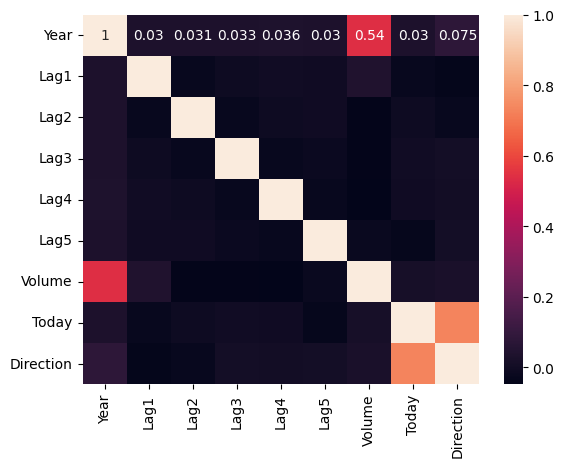

In [13]:
# Draw a correlation plot/matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)


In [ ]:
# Pairplot of the data
sns.pairplot(Smarket)

### Auto profiling (Optional)

In [ ]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(Smarket, title='Pandas Profiling Report', explorative=True)

# To display the report in a Jupyter notebook
profile.to_notebook_iframe()

# To save the report to a file
profile.to_file("Smarket_data_profile.html")

## Logistic Regression

What if we used Linear regression to predict Direction? Would it work? 

Here We are first trying with linear regression on Lag1 (without spliting the dataset into training and test sets), in order to get the intuition behind why we should not use linear regression for classification problem

In [21]:
from sklearn.linear_model import LinearRegression # we could also use sklearn.LinearRegression (??)
from sklearn.metrics import mean_squared_error, r2_score

# Selecting predictors
X = Smarket[['Lag1']]
# Target variable
Y = Smarket['Direction']

# Creating and fitting the logistic regression model
model = LinearRegression() # Increase max_iter if the model doesn't converge
model.fit(X, Y)

# Making predictions on both the training and test sets
Y_pred = model.predict(X)

# Calculate and print the MSE for both
mse = mean_squared_error(Y, Y_pred)

print(f'Model - MSE: {mse}')

# Print the model coefficients and intercept
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for Lag1: {model.coef_[0]}')
print('All Coefficients:', model.coef_)


Model - MSE: 0.24926681452510974
Intercept: 0.5184670611809835
Coefficient for Lag1: -0.01748935452315284
All Coefficients: [-0.01748935]


Can you think about any theoretical issue with regards to lenear regression for Classification?

### Now Logistic regression

<b> First lets do with all relevant predictors without train test split?

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
# Selecting predictors by dropping the columns not needed
X = Smarket.drop(['Today', 'Direction', 'Year'], axis=1)

# Target variable
Y = Smarket['Direction']

# Creating and fitting the logistic regression model on the entire dataset
model = LogisticRegression()  # Increase max_iter if the model doesn't converge
model.fit(X, Y)

# Making predictions on the entire dataset
Y_pred = model.predict(X)

# Calculating and printing performance metrics for the entire dataset
print("Accuracy on the Entire Dataset:", accuracy_score(Y, Y_pred))
print("\nConfusion Matrix (Entire Dataset):")
print(confusion_matrix(Y, Y_pred))
# print("\nClassification Report (Entire Dataset):")
# print(classification_report(Y, Y_pred))

#### (OPTIONAL) ######
# Printing the model coefficients and intercept 
print(f'Intercept: {model.intercept_[0]}')
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f'{feature}: {coef}')


Accuracy on the Entire Dataset: 0.5208

Confusion Matrix (Entire Dataset):
[[144 458]
 [141 507]]
Intercept: -0.12216382760643509
Coefficients:
Lag1: -0.073094490596368
Lag2: -0.04242156971710228
Lag3: 0.010944526956137476
Lag4: 0.00922520158963772
Lag5: 0.010225781803464933
Volume: 0.1327286804834362


In [46]:
conf_matrix_df = pd.DataFrame(confusion_matrix(Y, Y_pred), 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])

print(conf_matrix_df)

             Predicted Down  Predicted Up
Actual Down             144           458
Actual Up               141           507


Looks like the model is doing better (52% accuracy) than just simple random guess.

<b> Lets now split the data into train and test set.

In [ ]:
# This is our Model 1 for today

# Selecting predictors by dropping the columns not needed
X = Smarket.drop(['Today', 'Direction', 'Year'], axis=1)

# Target variable
Y = Smarket['Direction']

# Splitting the dataset based on the 'Year', as this is kind of time series dataset, otherwise we could follow the same approach as last week using train_test_split function
X_train = X[Smarket['Year'] < 2005]
Y_train = Y[Smarket['Year'] < 2005]
X_test = X[Smarket['Year'] >= 2005]
Y_test = Y[Smarket['Year'] >= 2005]

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))


Training Accuracy: 0.5250501002004008
Test Accuracy: 0.4880952380952381

Confusion Matrix (Train Data):
[[175 316]
 [158 349]]

Confusion Matrix (Test Data):
[[75 36]
 [93 48]]


Now, The test accuracy is about 48% while the error rate is about 52%

In [ ]:
# Now doing logistic regression on lag 1 and lag 2

# Model 2

# Selecting predictors
X = Smarket[['Lag1', 'Lag2']]

# Target variable
Y = Smarket['Direction']


Now do the results appear to be a little better?

Any differene in sensitivity and specificity?

In [ ]:
# OPTIONAL

# Suppose that we want to predict the returns associated with particular values of `Lag1` and `Lag2`. In particular, we want to predict  `Direction`  on a day when  `Lag1`  and  `Lag2`  equal $1.2$ and $1.1$, respectively, and on a day when they equal $1.5$ and $-0.8$.  We do this using the `predict()` function.

# Specified values for Lag1 and Lag2
input_data = pd.DataFrame({
    'Lag1': [1.2, 1.5],
    'Lag2': [1.1, -0.8]
})

# Predicting the Direction
predicted_directions = model.predict(input_data)

# Converting predicted classes back to 'Up' or 'Down' if needed
predicted_directions_readable = ['Up' if pred == 1 else 'Down' for pred in predicted_directions]
predicted_directions_readable

## K-Nearest Neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
# This is Model 1 (for KNN) for today (with KNN = 3)

# Selecting predictors
X = Smarket[['Lag1', 'Lag2']]
# Target variable
Y = Smarket['Direction']

# For some models like KNN, we need to do feature scaling
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(X)
X_std = scaler.transform(X)

# Splitting the dataset based on the 'Year', as this is kind of time series dataset, otherwise we could follow the same approach as last week using train_test_split function
X_train = X_std[Smarket['Year'] < 2005]
Y_train = Y[Smarket['Year'] < 2005]
X_test = X_std[Smarket['Year'] >= 2005]
Y_test = Y[Smarket['Year'] >= 2005]

# Creating and fitting the KNN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred_knn = knn_model.predict(X_train)
Y_test_pred_knn = knn_model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy (KNN, k=3):", accuracy_score(Y_train, Y_train_pred_knn))
print("Test Accuracy (KNN, k=3):", accuracy_score(Y_test, Y_test_pred_knn))

print("\nConfusion Matrix (Train Data, KNN, k=3):")
print(confusion_matrix(Y_train, Y_train_pred_knn))

print("\nConfusion Matrix (Test Data, KNN, k=3):")
print(confusion_matrix(Y_test, Y_test_pred_knn))


Training Accuracy (KNN, k=3): 0.7555110220440882
Test Accuracy (KNN, k=3): 0.5317460317460317

Confusion Matrix (Train Data, KNN, k=3):
[[358 133]
 [111 396]]

Confusion Matrix (Test Data, KNN, k=3):
[[48 63]
 [55 86]]


You can now try with some other k values (Model 2, Model 3 for KNN etc) and find which K gives best results. This is called hyperparameter tuning.